In [84]:
import pandas as pd
from dateutil.parser import parse
import dateutil.parser
import datetime
import numpy as np
from uszipcode import Zipcode
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision',4)

# Goals / Methodology

__Goal:__
Our primary goal in this presentation is to maximize the number of signatures obtained at subway station entrances/exits via street marketing teams, focusing on those individuals who will attend the gala and contribute to WTWY’s cause.

__Methodology:__
To do so, we will look at MTA subway data as well as NYC Census data such as median household income to determine, not just the busiest stations, but the stations with the most value-added individuals considering our prompt above. Furthermore, we will look at the number of tech companies near stations to determine best allotment of street marketing team placement to properly capture our target group



# Importing Data

In [18]:
# helper function to read in data for appropriate dates
week_nums = [200905, 200912, 200919]

def get_data(week_nums):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    df = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        df.append(pd.read_csv(file_url))
    return pd.concat(df)

In [308]:
# read in data
mta = get_data(week_nums)

In [310]:
mta.shape

(628297, 11)

# Finding zipcode and demographic data for stations

In [20]:
# subset for only unique station names
unique_station = mta.drop_duplicates(subset=['STATION']).reset_index()

In [23]:
geolocator = Nominatim(user_agent="test_app")

# find unique latitude and longitude for each station
lat_long = []
for station in unique_station.STATION:
    try:
        loc = geolocator.geocode(f'{station} Station NYC')
        lat_long.append([station, (loc.latitude, loc.longitude)])
    # if cannot identify station name print the specific station
    except:
        print(station)



TIMES SQ-42 ST
WHITEHALL S-FRY
PARK PLACE
JAY ST-METROTEC
ATL AV-BARCLAY
CONEY IS-STILLW
W 8 ST-AQUARIUM
NEW LOTS
CANARSIE-ROCKAW
75 ST-ELDERTS
85 ST-FOREST PK
163 ST-AMSTERDM
81 ST-MUSEUM
59 ST COLUMBUS
42 ST-PORT AUTH
34 ST-PENN STA
HOYT-SCHER
CLINTON-WASH AV
BROADWAY JCT
OZONE PK LEFFRT
AQUEDUCT N.COND
AQUEDUCT RACETR
161/YANKEE STAD
JKSN HT-ROOSVLT
GRAND-NEWTOWN
MYRTLE-WILLOUGH
BEDFORD-NOSTRAN
47-50 STS ROCK
SMITH-9 ST
4 AV-9 ST
15 ST-PROSPECT
ROOSEVELT ISLND
21 ST-QNSBRIDGE
JAMAICA VAN WK
SUTPHIN-ARCHER
JAMAICA CENTER
72 ST-2 AVE
86 ST-2 AVE
96 ST-2 AVE
NEWARK HW BMEBE
JOURNAL SQUARE
PAVONIA/NEWPORT
TWENTY THIRD ST
THIRTY ST
LACKAWANNA
THIRTY THIRD ST
NEWARK BM BW
NEWARK C
NEWARK HM HE
PATH WTC 2
PATH NEW WTC
66 ST-LINCOLN
116 ST-COLUMBIA
137 ST CITY COL
GRD CNTRL-42 ST
68ST-HUNTER CO
138/GRAND CONC
149/GRAND CONC
WEST FARMS SQ
E 143/ST MARY'S
MORISN AV/SNDVW
VERNON-JACKSON
82 ST-JACKSON H
103 ST-CORONA
34 ST-HUDSON YD
GRAND ARMY PLAZ
EASTN PKWY-MUSM
CROWN HTS-UTICA
SUTTER AV-RUTL

In [24]:
# add in latitude and longitude for missing stations
missing = [['TIMES SQ-42 ST', (40.7559, -73.9871)],['WHITEHALL S-FRY', (40.7017, -74.0129)], ['PARK PLACE', (40.7132, -74.0093)], ['JAY ST-METROTEC', (40.69218,-73.985942)], ['ATL AV-BARCLAY', (40.683666,-73.97881)], ['CONEY IS-STILLW', (40.577422,-73.981233)], ['W 8 ST-AQUARIUM', (40.576127,-73.975939)], ['NEW LOTS', (40.658733,-73.899232)], ['CANARSIE-ROCKAW', (40.646654,-73.90185)], ['75 ST-ELDERTS', (40.691324,-73.867139)], ['85 ST-FOREST PK', (40.692435,-73.86001)], ['163 ST-AMSTERDM', (40.836013,-73.939892)], ['81 ST-MUSEUM', (40.781433,-73.972143)], ['59 ST COLUMBUS', (40.768296,-73.981736)], ['42 ST-PORT AUTH', (40.757308,-73.989735)], ['34 ST-PENN STA', (40.752287,-73.993391)], ['HOYT-SCHER', (40.688484,-73.985001)], ['CLINTON-WASH AV', (40.683263,-73.965838)], ['BROADWAY JCT', (40.679498,-73.904512)], ['OZONE PK LEFFRT', (40.685951,-73.825798)], ['AQUEDUCT N.COND', (40.668234,-73.834058)], ['AQUEDUCT RACETR', (40.672097,-73.835919)], ['161/YANKEE STAD', (40.827905,-73.925651)], ['JKSN HT-ROOSVLT', (40.746644,-73.891338)], ['GRAND-NEWTOWN', (40.737015,-73.877223)], ['MYRTLE-WILLOUGH', (40.694568,-73.949046)], ['BEDFORD-NOSTRAN', (40.689627,-73.953522)], ['47-50 STS ROCK', (40.758663,-73.981329)], ['SMITH-9 ST', (40.67358,-73.995959)], ['4 AV-9 ST', (40.670387, -73.98848)], ['15 ST-PROSPECT', (40.660365,-73.979493)], ['ROOSEVELT ISLND', (40.759145,-73.95326)], ['21 ST-QNSBRIDGE', (40.754203,-73.942836)], ['JAMAICA VAN WK', (40.709179,-73.820574)], ['SUTPHIN-ARCHER', (40.700486,-73.807969)], ['JAMAICA CENTER', (40.702147,-73.801109)], ['72 ST-2 AVE', (40.768799,-73.958424)], ['86 ST-2 AVE', (40.777891,-73.951787)], ['96 ST-2 AVE', (40.784318,-73.947152)], ['JOURNAL SQUARE', (40.732141, -74.063114)], ['PAVONIA/NEWPORT', (40.726676, -74.034757)], ['TWENTY THIRD ST', (40.741339, -73.989272)], ['THIRTY ST', (40.766859, -73.921423)], ['LACKAWANNA', (40.7359352, -74.0273625)], ['THIRTY THIRD ST', (40.7486, -73.9887)], ['NEWARK BM BW', (40.735657, -74.172363)], ['NEWARK HW BMEBE', (40.735657, -74.172363)], ['PATH WTC 2', (40.712742, -74.013382)], ['PATH NEW WTC', (40.712742, -74.013382)], ['66 ST-LINCOLN', (40.77344,-73.982209)], ['116 ST-COLUMBIA', (40.807722,-73.96411)], ['137 ST CITY COL', (40.821, -73.954)], ['GRD CNTRL-42 ST', (40.751776,-73.976848)], ['68ST-HUNTER CO', (40.768141,-73.96387)], ['138/GRAND CONC', (40.813224,-73.929849)], ['149/GRAND CONC', (40.818375,-73.927351)], ['WEST FARMS SQ', (40.840295,-73.880049)], ["E 143/ST MARY'S", (40.808719,-73.907657)], ['MORISN AV/SNDVW', (40.829495, -73.874474)], ['VERNON-JACKSON', (40.742626,-73.953581)], ['82 ST-JACKSON H', (40.747659,-73.883697)], ['103 ST-CORONA', (40.749865,-73.8627)], ['34 ST-HUDSON YD', (40.753821,-73.981963)], ['GRAND ARMY PLAZ', (40.675235,-73.971046)], ['EASTN PKWY-MUSM', (40.671987,-73.964375)], ['CROWN HTS-UTICA', (40.668897,-73.932942)], ['SUTTER AV-RUTLD', (40.664717,-73.92261)], ['FLATBUSH AV-B.C', (40.632836,-73.947642)], ['EASTCHSTER/DYRE', (40.8883,-73.830834)], ['RIT-MANHATTAN', (43.0844, -77.6749)], ['RIT-ROOSEVELT', (43.0844, -77.6749)]]

In [25]:
station_lat_long = lat_long + missing

In [26]:
# search latitude and longitude to get zipcode, population, population density, median household income
search = SearchEngine(simple_zipcode=True)
zip_list = []
for i in range(len(station_lat_long)):
    try:
        zipcode = search.by_coordinates(station_lat_long[i][1][0], station_lat_long[i][1][1], returns=1)
        zip_list.append([station_lat_long[i][0], station_lat_long[i][1][0], station_lat_long[i][1][1], zipcode[0].zipcode, zipcode[0].population, zipcode[0].population_density, zipcode[0].median_household_income])
    # see if there is no match 
    except:
        print(station_lat_long[i][0])



In [27]:
# make the list into a dataframe
station_zip_demo = pd.DataFrame(zip_list, columns=['STATION', 'Latitude', 'Longitude', 'ZIPCODE', 'POPULATION', 'POPULATION_DEN', 'MEDIAN_INCOME'])

station_zip_demo.head()

,STATION,Latitude,Longitude,ZIPCODE,POPULATION,POPULATION_DEN,MEDIAN_INCOME
0,59 ST,40.6414,-74.0179,11220,99598,55603.0,37580.0
1,5 AV/59 ST,40.7648,-73.9727,10153,0,NaN,NaN
2,57 ST-7 AV,40.7647,-73.9806,10103,3,314.0,NaN
3,49 ST,40.7599,-73.9841,10020,0,NaN,NaN
4,34 ST-HERALD SQ,40.7496,-73.9879,10001,21102,33959.0,81671.0


# Finding tech company zipcode 

In [28]:
company = pd.read_excel('company.xlsx')

In [29]:
# find latitude and longitude based on compnay name
lat_long = []
for company in company.Company:
    try:
        loc = geolocator.geocode(f'{company} NY, USA')
        lat_long.append([company, loc.latitude, loc.longitude])
    # see companies that have no associated latitude and longitude
    except:
        print(company)

Deloitte
PricewaterhouseCoopers
ABM Industries
Standard Chartered USA
Omnicom Group
Philip Morris International
Historic TW
BOTTLING GROUP
Marsh & McLennan Companies
NBCUniversal
The Interpublic Group of Companies
American International Group
Arconic
Mount Sinai Health System
Kohlberg & Company
Colgate-Palmolive
iQor Holdings
Bunge
Mediterranean Shipping Company
Hyosung
MacAndrews & Forbes
Montefiore Health System
NIOXIN USA
Clairol Color
Carrols Restaurant Group
PVH
Hotel Acquisition Company
Weight Watchers International
Henry Schein
Roadhouse Holding
Infor
HRG Group
Xylem
Altice USA
Young & Rubicam
Hitachi America
Assurant
Continental Grain Company
Waldorf Astoria New York
Sutherland Global Services
Nature’s Bounty
KBC Bank


In [30]:
# add additional tech companies 
company_address = [['Slack', '436 Lafayette St, New York, NY 10003'], ['2U', '55 Prospect St., Brooklyn, NY 11201'], ['Compass', '90 Fifth Avenue, New York, NY 10011'],['Adobe', '1540 Broadway, New York, NY 10036'], ['Square', '375 W Broadway, New York, NY 10012'], ['Twitter', '249 W 17th St, New York, NY 10011'],['Facebook', '770 Broadway, New York, NY 10003'], ['Google', '111 8th Ave, New York, NY 10011'], ['Salesforce', '1095 Avenue of the Americas, New York, NY 10036'], ['Amazon', '450 West 33rd Street, New York, NY 10001'], ['Dashlane', '156 5th Ave, New York, NY 10010'], ['Transferwise', '19 W 24th Street, New York, NY 10010'], ['Sevenrooms', '122 W. 27th Street, New York, NY 10001'], ['seatgeek', '400 Lafayette St, New York, NY 10003, US'], ['greenhouse', '18 W 18th St, New York, NY 10011']]

for company, address in company_address:
    try:
        loc = geolocator.geocode(address)
        lat_long.append([company, loc.latitude, loc.longitude])
    except:
        print(company)

In [31]:
#make the list into dataframe
company_zip = pd.DataFrame(lat_long, columns=['Company', 'Latitude', 'Longitude'])


## Mapping tech companies on a map

In [363]:
import plotly.express as px
import plotly.graph_objects as go


In [372]:
fig = px.scatter_mapbox(company_zip, 'Latitude', 'Longitude', mapbox_style='open-street-map')
fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.75,
            lon=-73.97
        ),
        pitch=0,
        zoom=11
    )
)
fig.show()

In [337]:
fig = px.scatter_mapbox(company_zip, 'Latitude', 'Longitude')
fig.show()

## Stations that are nearby high median income areas

In [379]:
# add zipcode / demographic data to the station_traffic data
station_high_income = pd.merge(station_traffic, station_zip_demo, on='STATION', right_index=False)
station_high_income.head()

,STATION,TOTAL_TRAFFIC,Latitude,Longitude,ZIPCODE,POPULATION,POPULATION_DEN,MEDIAN_INCOME
0,34 ST-PENN STA,1195662.0,40.7523,-73.9934,10119,92,5592.0,NaN
1,34 ST-HERALD SQ,991485.0,40.7496,-73.9879,10001,21102,33959.0,81671.0
2,125 ST,924473.0,40.8043,-73.9374,10035,33969,24329.0,24533.0
3,86 ST,892940.0,40.7795,-73.9555,10028,45141,143683.0,104638.0
4,14 ST-UNION SQ,833793.0,40.7358,-73.9906,10003,56024,97188.0,92540.0


In [381]:
wealthiest_zip = ['10013', '10007', '10012', '10001', '10014', '10010', '10011', '10282', '10018']
station_high_income =station_high_income[station_high_income['ZIPCODE'].isin(wealthiest_zip)].sort_values(ascending=False, by='MEDIAN_INCOME')

In [392]:
fig = px.scatter_mapbox(company_zip, 'Latitude', 'Longitude', mapbox_style='carto-positron')
fig.add_scattermapbox(station_high_income, 'Latitude', 'Longitude', mapbox_style='carto-positron', color='STATION')
fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.75,
            lon=-73.97
        ),
        pitch=0,
        zoom=11
    )
)

fig.show()

ValueError: 
    Invalid value of type 'pandas.core.frame.DataFrame' received for the 'below' property of scattermapbox
        Received value:              STATION  TOTAL_TRAFFIC  Latitude  Longitude ZIPCODE  POPULATION  \
215       PATH WTC 2        76671.0   40.7127   -74.0134   10282        4783   
21      PATH NEW WTC       433834.0   40.7127   -74.0134   10282        4783   
306       PARK PLACE        40609.0   40.7132   -74.0093   10007        6988   
201            52 ST        82732.0   40.7127   -74.0060   10007        6988   
332        CITY HALL        31491.0   40.7133   -74.0070   10007        6988   
36       CHAMBERS ST       310541.0   40.7149   -74.0080   10007        6988   
54              1 AV       247361.0   40.7127   -74.0060   10007        6988   
138       CITY / BUS       116693.0   40.7127   -74.0060   10007        6988   
64    CHRISTOPHER ST       210782.0   40.7330   -74.0069   10014       31959   
11    TIMES SQ-42 ST       624200.0   40.7559   -73.9871   10018        5229   
5    42 ST-PORT AUTH       811438.0   40.7573   -73.9897   10018        5229   
123      14TH STREET       134288.0   40.7379   -74.0002   10011       50984   
245  TWENTY THIRD ST        62663.0   40.7413   -73.9893   10011       50984   
182         4AV-9 ST        89710.0   40.7341   -73.9996   10011       50984   
330             6 AV        32442.0   40.7375   -73.9971   10011       50984   
282            18 ST        46959.0   40.7410   -73.9979   10011       50984   
46              8 AV       272407.0   40.7399   -74.0027   10011       50984   
20             14 ST       438130.0   40.7379   -74.0002   10011       50984   
7              23 ST       724791.0   40.7441   -73.9956   10011       50984   
278       9TH STREET        48728.0   40.7341   -73.9996   10011       50984   
129        SPRING ST       124876.0   40.7223   -73.9972   10012       24090   
70   B'WAY-LAFAYETTE       200571.0   40.7253   -73.9962   10012       24090   
153        PRINCE ST       103090.0   40.7243   -73.9977   10012       24090   
29    W 4 ST-WASH SQ       335765.0   40.7316   -74.0010   10012       24090   
211      BLEECKER ST        77511.0   40.7259   -73.9947   10012       24090   
223       HOUSTON ST        73479.0   40.7286   -74.0053   10012       24090   
346      FRANKLIN ST        26012.0   40.7189   -74.0066   10013       27700   
110  THIRTY THIRD ST       142342.0   40.7486   -73.9887   10001       21102   
79             33 ST       191673.0   40.7464   -73.9818   10001       21102   
33             28 ST       323254.0   40.7472   -73.9934   10001       21102   
1    34 ST-HERALD SQ       991485.0   40.7496   -73.9879   10001       21102   

     POPULATION_DEN  MEDIAN_INCOME  
215         54674.0       230952.0  
21          54674.0       230952.0  
306         42751.0       216037.0  
201         42751.0       216037.0  
332         42751.0       216037.0  
36          42751.0       216037.0  
54          42751.0       216037.0  
138         42751.0       216037.0  
64          56119.0       108483.0  
11          16251.0       104635.0  
5           16251.0       104635.0  
123         77436.0       104238.0  
245         77436.0       104238.0  
182         77436.0       104238.0  
330         77436.0       104238.0  
282         77436.0       104238.0  
46          77436.0       104238.0  
20          77436.0       104238.0  
7           77436.0       104238.0  
278         77436.0       104238.0  
129         74517.0        86594.0  
70          74517.0        86594.0  
153         74517.0        86594.0  
29          74517.0        86594.0  
211         74517.0        86594.0  
223         74517.0        86594.0  
346         50154.0        83725.0  
110         33959.0        81671.0  
79          33959.0        81671.0  
33          33959.0        81671.0  
1           33959.0        81671.0  

    The 'below' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

# Preprocess MTA data

In [580]:
# remove trailing spaces in column names
mta.columns = [col.strip() for col in mta.columns]

# create a single new column with Date and Time combined
mta['DATETIME'] = pd.to_datetime(mta['DATE'] + " " + mta['TIME'])

# Get rid of the duplicate entry
mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)


# MTA Data Analysis

## Entries / Exits

In [581]:
# group by unique turnstile identifiers
# take the minimum entry value 
entries_by_date = mta.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])['ENTRIES', 'EXITS'].min().reset_index()

In [582]:
# shift the rows down by one and create a previous entries/exits on the same row
entries_by_date[["PREV_DATE", 'PREV_ENTRIES', 'PREV_EXITS']] = (entries_by_date.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME", 'ENTRIES', 'EXITS'].apply(lambda x: x.shift(1)))


In [583]:
# Drop the rows for the earliest date in the data
entries_by_date.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [584]:
entries_by_date['DAILY_ENTRIES'] = entries_by_date['ENTRIES']-entries_by_date['PREV_ENTRIES']
entries_by_date['DAILY_EXITS'] = entries_by_date['EXITS'] - entries_by_date['PREV_EXITS']

In [585]:
# set negative entry values to positive values 
entries_by_date['DAILY_ENTRIES'] = entries_by_date['DAILY_ENTRIES'].apply(lambda x: abs(x) if x<0 else x)
entries_by_date['DAILY_EXITS'] = entries_by_date['DAILY_EXITS'].apply(lambda x: abs(x) if x<0 else x)

In [586]:
# set excessively large entries to NaN
entries_by_date.loc[(entries_by_date['DAILY_ENTRIES']>100000) | (entries_by_date['DAILY_ENTRIES']==0)] = np.nan
entries_by_date.loc[(entries_by_date['DAILY_EXITS']>100000) | (entries_by_date['DAILY_EXITS']==0)] = np.nan


In [587]:
# add up daily entries and exits to get total traffic
entries_by_date['TOTAL_TRAFFIC'] = entries_by_date['DAILY_ENTRIES'] + entries_by_date['DAILY_EXITS']

## Group by station / total traffic for september 

In [588]:
# group by station to get total entries for the month of september for each station
station_traffic = entries_by_date.groupby('STATION')['TOTAL_TRAFFIC'].sum().sort_values(ascending=False).reset_index()
station_traffic.head(10)

,STATION,TOTAL_TRAFFIC
0,34 ST-PENN STA,1271545.0
1,34 ST-HERALD SQ,1039988.0
2,125 ST,972648.0
3,86 ST,950062.0
4,14 ST-UNION SQ,878973.0
5,GRD CNTRL-42 ST,872828.0
6,42 ST-PORT AUTH,852579.0
7,23 ST,765142.0
8,FLUSHING-MAIN,751172.0
9,FULTON ST,704916.0


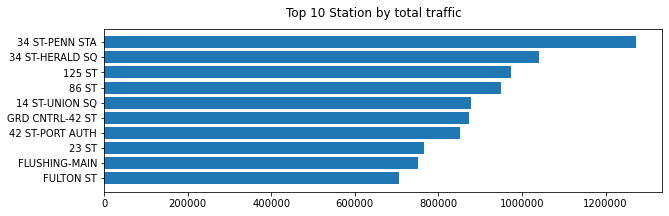

In [465]:
fig, ax = plt.subplots(figsize=(10,3))
ax.barh(station_traffic.head(10).STATION, station_traffic.head(10).TOTAL_TRAFFIC)
fig.suptitle('Top 10 Station by total traffic')
ax.invert_yaxis()
ax.xaxis.get_major_formatter().set_scientific(False)



## Group by day of the week

In [589]:
entries_by_day_of_week = entries_by_date.copy(deep=True)

In [590]:
entries_by_day_of_week['DAY_OF_WEEK'] = entries_by_day_of_week.DATETIME.dt.day_name()

In [591]:
entries_by_day_of_week = entries_by_day_of_week.groupby(['STATION', 'DAY_OF_WEEK'])['TOTAL_TRAFFIC'].sum().reset_index()

Text(0.5, 1.0, 'Traffic flow by day of the week')

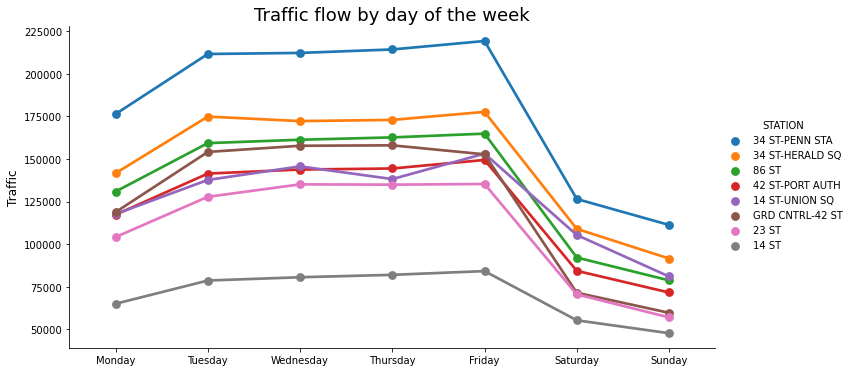

In [602]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot('DAY_OF_WEEK', 'TOTAL_TRAFFIC', kind='point',hue='STATION',order=order, hue_order=['34 ST-PENN STA', '34 ST-HERALD SQ', '86 ST','42 ST-PORT AUTH', '14 ST-UNION SQ', 'GRD CNTRL-42 ST', '23 ST', '14 ST'], aspect=2, data=entries_by_day_of_week)
plt.xlabel('')
plt.ylabel('Traffic', size=12)
plt.title('Traffic flow by day of the week', size=18)


In [509]:
entries_weekday = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [514]:
entries_weekend = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Saturday', 'Sunday'])]

In [516]:
entries_weekend.groupby('STATION').TOTAL_TRAFFIC.sum().sort_values(ascending=False)

STATION
34 ST-PENN STA     237865.0
125 ST             205183.0
34 ST-HERALD SQ    200641.0
14 ST-UNION SQ     186511.0
86 ST              171008.0
PATH NEW WTC       170308.0
42 ST-PORT AUTH    156104.0
FLUSHING-MAIN      151246.0
JKSN HT-ROOSVLT    134000.0
GRD CNTRL-42 ST    131333.0
TIMES SQ-42 ST     130181.0
23 ST              127689.0
59 ST              120649.0
FULTON ST          120293.0
CANAL ST           117812.0
96 ST              117227.0
59 ST COLUMBUS     107736.0
145 ST             106010.0
14 ST              103193.0
ATL AV-BARCLAY     102006.0
CHURCH AV           93937.0
72 ST               90814.0
JAMAICA CENTER      83657.0
W 4 ST-WASH SQ      82717.0
JUNCTION BLVD       82014.0
BEDFORD AV          77936.0
GRAND ST            76432.0
116 ST              73511.0
8 AV                72347.0
181 ST              72130.0
103 ST-CORONA       71996.0
CROWN HTS-UTICA     68386.0
KINGS HWY           65880.0
82 ST-JACKSON H     64693.0
NOSTRAND AV         63124.0
103 ST      

## Group by time (4 hours)

In [593]:
entries_by_time = entries_by_date.copy(deep=True)

In [594]:
entries_by_time = entries_by_time.groupby('STATION').resample('4H', on='DATETIME').sum().reset_index()

In [595]:
entries_by_time['TIME'] = entries_by_time['DATETIME'].dt.time

In [596]:
#rename time labels for clarification
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(0, 0), 'label'] = '8pm-12am'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(4, 0), 'label'] = '12am-4am'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(8, 0), 'label'] = '4am-8am'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(12, 0), 'label'] = '8am-12pm'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(16, 0), 'label'] = '12pm-4pm'
entries_by_time.loc[entries_by_time['TIME'] == datetime.time(20, 0), 'label'] = '4pm-8pm'

In [597]:
entries_by_time = entries_by_time.groupby(['STATION', 'label'])['TOTAL_TRAFFIC'].sum().reset_index().sort_values(by='TOTAL_TRAFFIC', ascending=False)

## subset for our target stations

In [598]:
top_stations = entries_by_time.loc[(entries_by_time['STATION'] == '23 ST') | (entries_by_time['STATION'] == '14 ST') | (entries_by_time['STATION'] == '86 ST') | (entries_by_time['STATION'] == '14 ST-UNION SQ') | (entries_by_time['STATION'] == '34 ST-HERALD SQ') | (entries_by_time['STATION'] == '34 ST-PENN STA') | (entries_by_time['STATION'] == '42 ST-PORT AUTH') | (entries_by_time['STATION'] == 'GRD CNTRL-42 ST')]

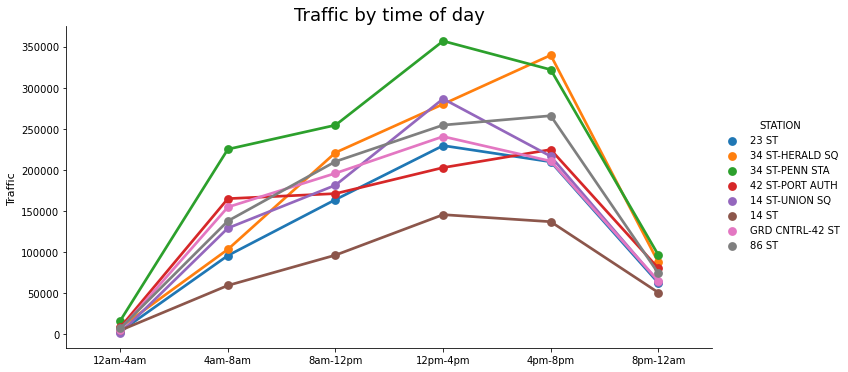

In [600]:
order = ['12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am']
sns.catplot('label', 'TOTAL_TRAFFIC', kind='point', hue='STATION', aspect =2, order=order, hue_order=['23 ST', '34 ST-HERALD SQ', '34 ST-PENN STA', '42 ST-PORT AUTH', '14 ST-UNION SQ', '14 ST', 'GRD CNTRL-42 ST', '86 ST'], data=top_stations)
plt.xlabel('')
plt.ylabel('Traffic', size=11)
plt.title('Traffic by time of day', size=18)




## Day of the week

In [232]:
entries_by_date['DAY_OF_WEEK'] = entries_by_date['DATETIME'].dt.day_name()

In [233]:
entries_by_day_of_week = entries_by_date.groupby(['STATION', 'DAY_OF_WEEK'])['TOTAL_TRAFFIC'].sum().reset_index()

In [234]:
entries_weekday = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Monday', 'Tuseday', 'Wednesday', 'Thursday', 'Friday'])]

In [235]:
entries_weekday.groupby(['STATION']).TOTAL_TRAFFIC.sum().sort_values(ascending=False)

STATION
34 ST-PENN STA     820487.0
34 ST-HERALD SQ    672636.0
86 ST              623053.0
125 ST             620591.0
GRD CNTRL-42 ST    566312.0
14 ST-UNION SQ     558302.0
42 ST-PORT AUTH    557031.0
23 ST              513694.0
FLUSHING-MAIN      478393.0
FULTON ST          470324.0
59 ST              443590.0
96 ST              430400.0
TIMES SQ-42 ST     419451.0
JKSN HT-ROOSVLT    413632.0
CANAL ST           350002.0
59 ST COLUMBUS     334759.0
JAMAICA CENTER     327891.0
CHURCH AV          302312.0
ATL AV-BARCLAY     301009.0
47-50 STS ROCK     296848.0
145 ST             294095.0
72 ST              293850.0
14 ST              292737.0
PATH NEW WTC       284014.0
KINGS HWY          269713.0
JUNCTION BLVD      252187.0
77 ST              247215.0
28 ST              241131.0
116 ST             236869.0
181 ST             235432.0
CROWN HTS-UTICA    232651.0
JOURNAL SQUARE     220507.0
103 ST             220311.0
W 4 ST-WASH SQ     218374.0
103 ST-CORONA      217718.0
72 ST-2 AVE 

In [237]:
entries_weekend = entries_by_day_of_week.loc[entries_by_day_of_week['DAY_OF_WEEK'].isin(['Saturday', 'Sunday'])]